1. Ваша задача - построить предиктивную модель предсказания целевой переменной в зависимости от значения нескольких факторов (признаков).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

2. Загрузите датасет. Вам понадобится два файла - отдельно с признаками (помечен x) и значениями целевой переменной (помечен y). Файлы не содержат заголовков столбцов и строк.

In [23]:
x_ = pd.read_csv('data/1_x.csv',names=['x1','x2','x3','x4','x5','x6','x7'])
y_ = pd.read_csv('data/1_y.csv', names = ['Y'])

In [24]:
x_

,x1,x2,x3,x4,x5,x6,x7
0,1.599865,0.340598,-0.603400,0.150586,-0.209677,0.955045,0.347682
1,1.472656,0.466832,-1.947130,0.625906,0.589354,0.753521,-2.138552
2,0.279378,-1.717121,0.251069,0.730013,0.301801,-0.206711,0.894811
3,0.450771,1.133196,-0.294028,-2.595338,0.313911,1.953527,0.359938
4,1.507042,0.932115,-0.789549,1.043712,-1.404000,-0.124354,-0.921117
...,...,...,...,...,...,...,...
120,1.018825,1.618920,-1.561572,1.057171,1.893181,-0.647510,1.220188
121,-1.244391,0.327816,-1.004231,-1.877654,1.307478,-1.839689,-0.176182
122,-1.968106,-0.054336,0.558046,-0.527741,-0.060449,0.531740,-0.374088
123,-0.970556,0.436830,0.877973,-0.970337,-0.282711,-1.464295,-0.976662


In [25]:
y_

,Y
0,101.507602
1,-65.305680
2,152.189336
3,-109.702103
4,-11.188624
...,...
120,293.947002
121,-146.511266
122,-143.163481
123,-188.233401


3. Сделайте количественное описание датасета: количество точек данных, признаков, статистику по каждому признаку.




### X

In [26]:
x_.shape

(125, 7)

In [48]:
x_.count().sum()

875

In [27]:
x_.describe()

,x1,x2,x3,x4,x5,x6,x7
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,-0.046701,0.173034,0.049015,-0.005271,-0.095981,-0.107452,-0.056552
std,0.933281,0.928898,0.984631,1.000964,1.087336,0.928998,1.064615
min,-2.190258,-2.358885,-2.081062,-2.898741,-2.841371,-2.907825,-2.138552
25%,-0.775334,-0.429173,-0.657021,-0.685499,-0.869306,-0.672357,-0.936561
50%,0.030645,0.204892,-0.048617,0.054299,-0.102158,-0.174373,0.062705
75%,0.545665,0.755290,0.804735,0.659364,0.689661,0.531740,0.596198
max,2.092059,3.142216,2.272042,2.065050,2.660842,2.086050,3.026906


### Y

In [28]:
y_.shape

(125, 1)

In [49]:
y_.count().sum()

125

In [29]:
y_.describe()

,Y
count,125.000000
mean,-10.905182
std,135.622216
min,-288.468951
25%,-115.832866
50%,1.582923
75%,92.343694
max,293.947002


4. Разделите все наблюдения на обучающую и тестовую выборки в соотношении 80-20.


In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_, y_, test_size=0.2, random_state=0)

5. Для целевой и каждого из признаков постройте парную регрессионную модель. Визуализируйте линию регрессии и исходные данные на графике. При помощи коэффициентов оцените силу связи.

### Коэффициент детерминации R^2
1. Коэффициент детерминации характеризует долю вариации (дисперсии) результативного признака y, объясняемую регрессией, в общей вариации (дисперсии) y . Коэффициент детерминации рассчитывается для оценки качества подбора уравнения регрессии (насколько хорошо предсказывается модель).
2. Коэф детерминации показывает насколько зависима переменная от других независимых переменных
3. Бывают случаи, когда коэф может давать отрицательные значения. Это может возникнуть, когда прогнозы, которые сравниваются с соответствующими результатами, не были получены с помощью процедуры подгонки модели с использованием этих данных.

In [31]:
from sklearn.linear_model import LinearRegression

In [50]:
def define_r2(column_name):
    
    #Модель линейной регрессии
    y = LinearRegression().fit(x_train[[column_name]].values, y_train.values)
    #Прогнозируем значения
    y_res = y.predict(x_test[[column_name]].values)
    
    #Строим точки значений на графике 
    plt.scatter(x_test[[column_name]].values, y_test.values, color='b')
    #Строим линию регрессии
    plt.plot(x_test[[column_name]].values, y_res, color='r', linewidth=2)
    #Высчитываем показатель R2
    r_2 = y.score(x_test[[column_name]].values,  y_test.values)

    print(f"Коэф детерминации R^2: {r_2}")

### Определение коэф детерминации R^2 для каждого фактора

Коэф детерминации R^2: 0.07229189832505734
Коэф детерминации R^2: -0.09532321768717522
Коэф детерминации R^2: 0.014617914415054112
Коэф детерминации R^2: 0.09096452224815887
Коэф детерминации R^2: 0.2405271832792878
Коэф детерминации R^2: -0.04964379863853963
Коэф детерминации R^2: 0.456538247989299


(None, None, None, None, None, None, None)

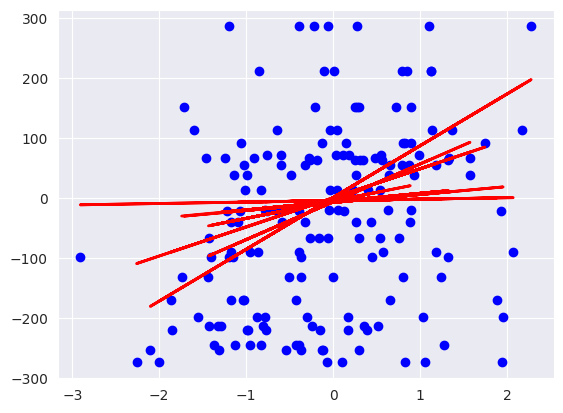

In [51]:
define_r2("x1"), define_r2("x2"), define_r2("x3"), define_r2("x4"), define_r2("x5"), define_r2("x6"), define_r2("x7")

### x1 фактор

Коэф детерминации R^2: 0.07229189832505734


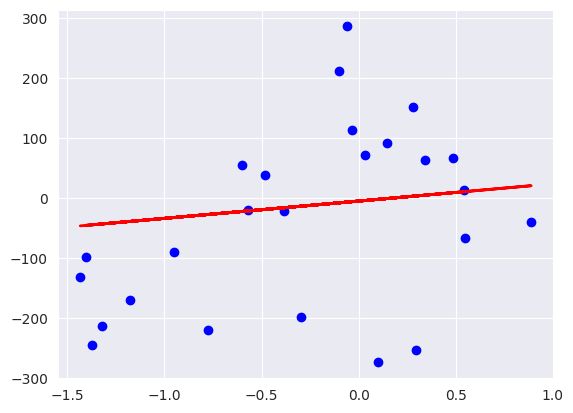

In [52]:
define_r2("x1")

### x2 фактор

Коэф детерминации R^2: -0.09532321768717522


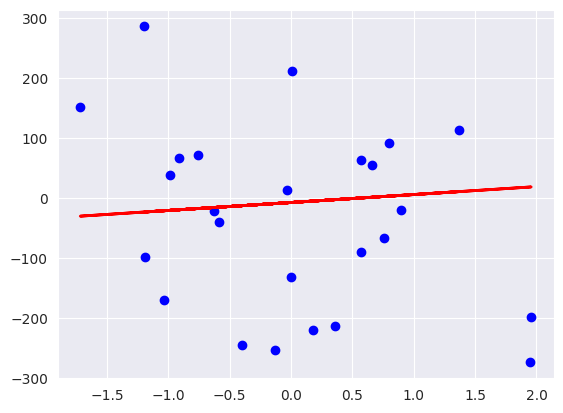

In [53]:
define_r2("x2")

### x3 Фактор

Коэф детерминации R^2: 0.014617914415054112


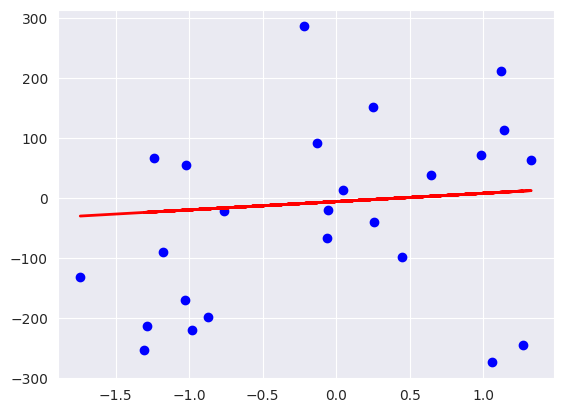

In [54]:
define_r2("x3")

### x4 фактор

Коэф детерминации R^2: 0.09096452224815887


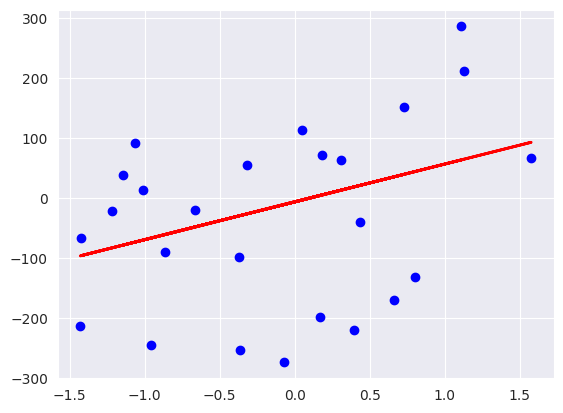

In [55]:
define_r2("x4")

### x5 фактор

Коэф детерминации R^2: 0.2405271832792878


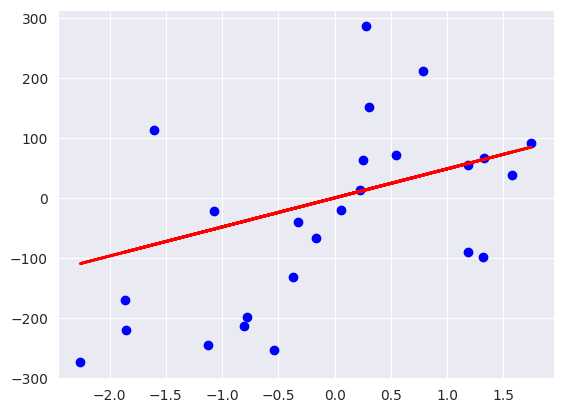

In [56]:
define_r2("x5")

### x6 фактор

Коэф детерминации R^2: -0.04964379863853963


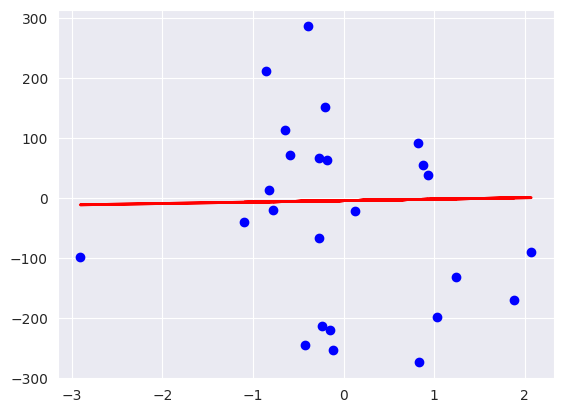

In [57]:
define_r2("x6")

### x7 фактор

Коэф детерминации R^2: 0.456538247989299


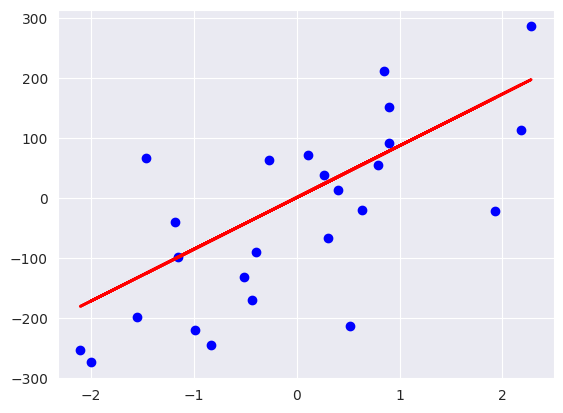

In [58]:
define_r2("x7")

Связь имеется, но ниже средней

### Вывод
1. x7 - связь ниже средней

6. Постройте модель множественной линейной регрессии целевой переменной от всех показателей. Оцените качество регрессии, сделайте вывод.

In [59]:
# Удобный интерфейс для указания моделей с использованием строк формул и DataFrame'ов

import statsmodels.formula.api as sm

data = pd.DataFrame(np.array(x_train[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']]), 
                            columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7'])
data['y'] = np.array(y_train)
cols = data.columns.tolist()
cols = cols[-1:] + cols[:-1]
data = data[cols]

# Используем метод наименьших квадратов
model = sm.ols(formula='y~x1+x2+x3+x4+x5+x6+x7', data=data)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     2342.
Date:                Wed, 02 Nov 2022   Prob (F-statistic):          1.04e-100
Time:                        15:24:41   Log-Likelihood:                -369.50
No. Observations:                 100   AIC:                             755.0
Df Residuals:                      92   BIC:                             775.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0069      1.082      0.931      0.354      -1.141       3.155
x1            50.9266      1.075     47.391      0.000      48.792      53.061
x2             0.5109      1.151      0.444      0.658      -1.775       2.796
x3            23.6751      1.076     22.000      0.000      21.538      25.812
x4            69.7836      1.014     68.805      0.000      67.769      71.798
x5            56.3991      0.994     56.741      0.000      54.425      58.373
x6             0.2016      1.178      0.171      0.864      -2.138       2.541
x7            81.7053      1.008     81.090      0.000      79.704      83.706
==============================================================================
Omnibus:                        0.359   Durbin-Watson:                   2.233
Prob(Omnibus):                  0.836   Jarque-Bera (JB):                0.171
Skew:                          -0.099   Prob(JB):                        0.918
Kurtosis:                       3.046   Cond. No.                         1.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Общие выводы

1. Учитывая все факторы, можно сказать, что с моделью можно работать, тк общий показатель модели по R^2 = 0.994
2. x7 - наиболее влияющий факторы с коэф ~82